<a href="https://colab.research.google.com/github/SBrouck/airbnb-seattle-sql-analytics/blob/main/airbnb_seattle_sql_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the SQL extension and initialize a local SQLite database for the project.
# This database will store our Airbnb Seattle dataset and allow us to run real SQL queries.

%load_ext sql
%sql sqlite:///airbnb_seattle.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
from google.colab import files
uploaded = files.upload()


Saving neighbourhoods.csv to neighbourhoods (1).csv
Saving reviews.csv to reviews (1).csv
Saving listings.csv to listings (1).csv
Saving calendar.csv.gz to calendar.csv (1).gz


In [4]:
import pandas as pd

# Load each CSV (or gzipped CSV) into pandas DataFrames using the correct filenames
listings = pd.read_csv("listings (1).csv")
calendar = pd.read_csv("calendar.csv (1).gz")
reviews = pd.read_csv("reviews (1).csv")
neighbourhoods = pd.read_csv("neighbourhoods (1).csv")


In [9]:
import sqlite3

# I create a local SQLite database to store the Airbnb dataset
conn = sqlite3.connect("airbnb_seattle.db")

# Each DataFrame is inserted as a separate SQL table in the database
listings.to_sql("listings", conn, if_exists="replace", index=False)
calendar.to_sql("calendar", conn, if_exists="replace", index=False)
reviews.to_sql("reviews", conn, if_exists="replace", index=False)
neighbourhoods.to_sql("neighbourhoods", conn, if_exists="replace", index=False)


90

In [12]:
# Updated fix for SQL output display in Google Colab (avoids KeyError: 'DEFAULT')
import IPython
from google.colab import output
output.enable_custom_widget_manager()


In [14]:
# Execute a SQL query directly via pandas and display the result as a DataFrame
query = """
SELECT neighbourhood, COUNT(*) AS num_listings
FROM listings
GROUP BY neighbourhood
ORDER BY num_listings DESC
LIMIT 10;
"""

pd.read_sql_query(query, conn)


,neighbourhood,num_listings
0,Broadway,382
1,Belltown,369
2,University District,267
3,Wallingford,254
4,Minor,252
5,Fremont,232
6,Central Business District,156
7,North Beacon Hill,150
8,Green Lake,143
9,Stevens,139


In [16]:
query = """
-- Rough revenue estimate: sum of unavailable nights × nightly price
SELECT
  l.host_id,
  SUM(REPLACE(c.price, '$', '') * 1.0) AS estimated_revenue
FROM calendar c
JOIN listings l ON c.listing_id = l.id
WHERE c.available = 'f'
GROUP BY l.host_id
ORDER BY estimated_revenue DESC
LIMIT 10;
"""

pd.read_sql_query(query, conn)


,host_id,estimated_revenue
0,107434423,5928809.0
1,121688409,2005689.0
2,3074414,1692663.0
3,487344448,1594105.0
4,398317720,1548362.0
5,25110157,1213818.0
6,238425582,1205283.0
7,529119042,1138043.0
8,399759096,1054902.0
9,436672049,1009961.0


In [18]:
from google.colab import files

# Upload files again into the Colab environment
uploaded = files.upload()


Saving neighbourhoods.csv to neighbourhoods (2).csv
Saving reviews.csv to reviews (2).csv
Saving listings.csv to listings (2).csv
Saving calendar.csv.gz to calendar.csv (2).gz


In [19]:
import pandas as pd

# Load each uploaded file into a DataFrame using the correct names
listings = pd.read_csv("listings (2).csv")
calendar = pd.read_csv("calendar.csv (2).gz")
reviews = pd.read_csv("reviews (2).csv")
neighbourhoods = pd.read_csv("neighbourhoods (2).csv")


In [20]:
import sqlite3

# Create or connect to a local SQLite database
conn = sqlite3.connect("airbnb_seattle.db")

# Insert each DataFrame as a table into the database
listings.to_sql("listings", conn, if_exists="replace", index=False)
calendar.to_sql("calendar", conn, if_exists="replace", index=False)
reviews.to_sql("reviews", conn, if_exists="replace", index=False)
neighbourhoods.to_sql("neighbourhoods", conn, if_exists="replace", index=False)


90

In [21]:
# List all columns in the 'listings' table to verify exact names
pd.read_sql_query("PRAGMA table_info(listings);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,name,TEXT,0,None,0
2,2,host_id,INTEGER,0,None,0
3,3,host_name,TEXT,0,None,0
4,4,neighbourhood_group,TEXT,0,None,0
5,5,neighbourhood,TEXT,0,None,0
6,6,latitude,REAL,0,None,0
7,7,longitude,REAL,0,None,0
8,8,room_type,TEXT,0,None,0
9,9,price,REAL,0,None,0


In [22]:
query = """
SELECT
  neighbourhood,
  COUNT(*) AS num_listings,
  ROUND(AVG(price), 2) AS avg_price,
  ROUND(AVG(number_of_reviews), 1) AS avg_num_reviews,
  ROUND(AVG(reviews_per_month), 2) AS avg_reviews_per_month
FROM listings
GROUP BY neighbourhood
ORDER BY num_listings DESC
LIMIT 15;
"""

pd.read_sql_query(query, conn)


,neighbourhood,num_listings,avg_price,avg_num_reviews,avg_reviews_per_month
0,Broadway,382,150.28,93.9,2.66
1,Belltown,369,189.61,103.4,3.51
2,University District,267,121.53,39.5,1.23
3,Wallingford,254,174.14,78.2,1.89
4,Minor,252,163.00,72.7,2.59
5,Fremont,232,157.39,121.3,2.49
6,Central Business District,156,223.35,64.2,2.87
7,North Beacon Hill,150,157.66,91.6,2.55
8,Green Lake,143,172.62,84.7,1.77
9,Stevens,139,187.58,75.5,1.90


In [23]:
query = """
SELECT
  l.neighbourhood,
  ROUND(100.0 * SUM(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) / COUNT(*), 2) AS avg_occupancy_rate
FROM calendar c
JOIN listings l ON c.listing_id = l.id
GROUP BY l.neighbourhood
ORDER BY avg_occupancy_rate DESC
LIMIT 15;
"""

pd.read_sql_query(query, conn)


,neighbourhood,avg_occupancy_rate
0,South Beacon Hill,62.93
1,Interbay,62.41
2,Bitter Lake,60.06
3,Harrison/Denny-Blaine,59.06
4,Lawton Park,56.47
5,South Park,55.63
6,View Ridge,55.46
7,High Point,55.37
8,Holly Park,55.07
9,North Delridge,54.71


In [24]:
# Calculate global averages to set benchmarks
avg_price = listings["price"].mean()
avg_reviews_per_month = listings["reviews_per_month"].mean()

# Calculate occupancy rate per listing
query = """
SELECT
  c.listing_id,
  ROUND(100.0 * SUM(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) / COUNT(*), 2) AS occupancy_rate
FROM calendar c
GROUP BY c.listing_id
"""

df_occupancy = pd.read_sql_query(query, conn)


In [25]:
# Merge occupancy with listings
df_perf = pd.merge(listings, df_occupancy, left_on="id", right_on="listing_id")

# Filter listings above all 3 thresholds
top_listings = df_perf[
    (df_perf["price"] > avg_price) &
    (df_perf["reviews_per_month"] > avg_reviews_per_month) &
    (df_perf["occupancy_rate"] > 70)  # 70% is an arbitrary strong threshold
]

top_listings[["id", "neighbourhood", "price", "reviews_per_month", "occupancy_rate"]].sort_values(by="occupancy_rate", ascending=False).head(10)


,id,neighbourhood,price,reviews_per_month,occupancy_rate
3665,744293259321928723,West Queen Anne,257.0,2.80,100.00
5360,1075378410554732213,Mid-Beacon Hill,262.0,2.43,100.00
968,19846504,North Queen Anne,180.0,5.52,99.73
1097,22109476,North Beach/Blue Ridge,171.0,3.86,99.73
2727,53418235,North Queen Anne,210.0,5.19,99.45
4333,881146279899026057,North Beacon Hill,195.0,4.12,99.18
1889,43519844,Fremont,199.0,2.31,98.63
1779,40154230,Genesee,243.0,3.18,98.08
1855,42401874,Mid-Beacon Hill,187.0,3.36,97.81
2393,50899512,Roosevelt,275.0,2.56,97.53


In [26]:
query = """
SELECT
  room_type,
  COUNT(*) AS num_listings,
  ROUND(AVG(price), 2) AS avg_price,
  ROUND(AVG(number_of_reviews), 1) AS avg_num_reviews,
  ROUND(AVG(reviews_per_month), 2) AS avg_reviews_per_month
FROM listings
GROUP BY room_type
ORDER BY num_listings DESC;
"""

df_room_summary = pd.read_sql_query(query, conn)
df_room_summary


,room_type,num_listings,avg_price,avg_num_reviews,avg_reviews_per_month
0,Entire home/apt,5610,180.41,82.9,2.32
1,Private room,1129,96.40,54.0,1.75
2,Hotel room,30,481.00,16.1,1.81
3,Shared room,1,99.00,3.0,0.97


In [27]:
query = """
SELECT
  l.room_type,
  ROUND(100.0 * SUM(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) / COUNT(*), 2) AS avg_occupancy
FROM calendar c
JOIN listings l ON c.listing_id = l.id
GROUP BY l.room_type
ORDER BY avg_occupancy DESC;
"""

df_room_occupancy = pd.read_sql_query(query, conn)
df_room_occupancy


,room_type,avg_occupancy
0,Shared room,50.41
1,Entire home/apt,44.04
2,Private room,41.52
3,Hotel room,14.92


In [28]:
df_room_analysis = pd.merge(df_room_summary, df_room_occupancy, on="room_type")
df_room_analysis


,room_type,num_listings,avg_price,avg_num_reviews,avg_reviews_per_month,avg_occupancy
0,Entire home/apt,5610,180.41,82.9,2.32,44.04
1,Private room,1129,96.40,54.0,1.75,41.52
2,Hotel room,30,481.00,16.1,1.81,14.92
3,Shared room,1,99.00,3.0,0.97,50.41


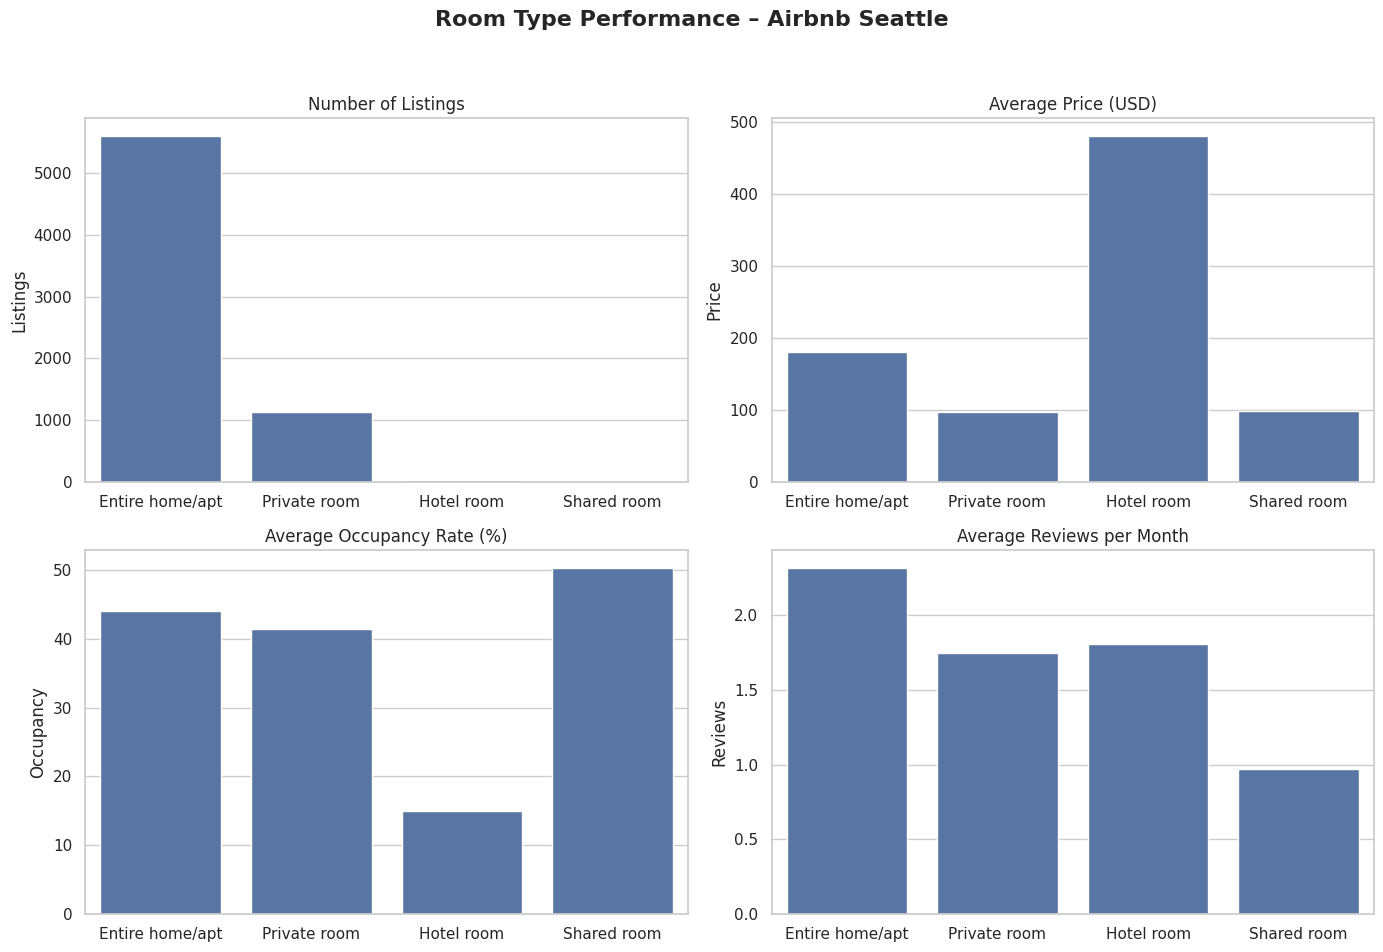

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connection à la base SQLite
conn = sqlite3.connect("airbnb_seattle.db")

# Résumé par type de logement
query_summary = """
SELECT
  room_type,
  COUNT(*) AS num_listings,
  ROUND(AVG(price), 2) AS avg_price,
  ROUND(AVG(number_of_reviews), 1) AS avg_num_reviews,
  ROUND(AVG(reviews_per_month), 2) AS avg_reviews_per_month
FROM listings
GROUP BY room_type
ORDER BY num_listings DESC;
"""
df_room_summary = pd.read_sql_query(query_summary, conn)

# Taux d’occupation par type de logement
query_occupancy = """
SELECT
  l.room_type,
  ROUND(100.0 * SUM(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) / COUNT(*), 2) AS avg_occupancy
FROM calendar c
JOIN listings l ON c.listing_id = l.id
GROUP BY l.room_type
ORDER BY avg_occupancy DESC;
"""
df_room_occupancy = pd.read_sql_query(query_occupancy, conn)

# Fusion des deux
df_room_analysis = pd.merge(df_room_summary, df_room_occupancy, on="room_type")

# Setup du style
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Room Type Performance – Airbnb Seattle", fontsize=16, weight="bold")

# Nombre d’annonces
sns.barplot(data=df_room_analysis, x="room_type", y="num_listings", ax=axs[0, 0])
axs[0, 0].set_title("Number of Listings")
axs[0, 0].set_ylabel("Listings")
axs[0, 0].set_xlabel("")

# Prix moyen
sns.barplot(data=df_room_analysis, x="room_type", y="avg_price", ax=axs[0, 1])
axs[0, 1].set_title("Average Price (USD)")
axs[0, 1].set_ylabel("Price")
axs[0, 1].set_xlabel("")

# Taux d’occupation
sns.barplot(data=df_room_analysis, x="room_type", y="avg_occupancy", ax=axs[1, 0])
axs[1, 0].set_title("Average Occupancy Rate (%)")
axs[1, 0].set_ylabel("Occupancy")
axs[1, 0].set_xlabel("")

# Reviews mensuels
sns.barplot(data=df_room_analysis, x="room_type", y="avg_reviews_per_month", ax=axs[1, 1])
axs[1, 1].set_title("Average Reviews per Month")
axs[1, 1].set_ylabel("Reviews")
axs[1, 1].set_xlabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [34]:
%%sql

SELECT room_type, COUNT(*) AS num_listings
FROM listings
GROUP BY room_type;


 * sqlite:///airbnb_seattle.db
Done.


room_type,num_listings
Entire home/apt,5610
Hotel room,30
Private room,1129
Shared room,1


In [35]:
%%sql

SELECT
  STRFTIME('%Y-%m', date) AS month,
  ROUND(AVG(REPLACE(price, '$', '') * 1.0), 2) AS avg_price
FROM calendar
WHERE price IS NOT NULL
GROUP BY month
ORDER BY month;


 * sqlite:///airbnb_seattle.db
Done.


month,avg_price
2024-12,188.74
2025-01,188.74
2025-02,188.74
2025-03,188.74
2025-04,188.74
2025-05,188.74
2025-06,188.74
2025-07,188.74
2025-08,188.74
2025-09,188.74


In [36]:
%%sql

SELECT
  STRFTIME('%w', date) AS weekday,
  ROUND(AVG(REPLACE(price, '$', '') * 1.0), 2) AS avg_price
FROM calendar
WHERE price IS NOT NULL
GROUP BY weekday
ORDER BY weekday;


 * sqlite:///airbnb_seattle.db
Done.


weekday,avg_price
0,188.69
1,188.69
2,188.71
3,188.71
4,188.71
5,188.71
6,188.71


In [37]:
%%sql

SELECT
  STRFTIME('%w', date) AS weekday,
  ROUND(100.0 * SUM(CASE WHEN available = 'f' THEN 1 ELSE 0 END) / COUNT(*), 2) AS occupancy_rate
FROM calendar
GROUP BY weekday
ORDER BY weekday;


 * sqlite:///airbnb_seattle.db
Done.


weekday,occupancy_rate
0,43.33
1,43.56
2,42.97
3,43.05
4,43.47
5,44.01
6,44.08


Text(0.5, 0.98, 'Airbnb Seattle – Temporal Price & Occupancy Trends')

<Axes: xlabel='month', ylabel='avg_price'>

Text(0.5, 1.0, 'Average Price per Month')

Text(0, 0.5, 'USD')

<Axes: xlabel='weekday', ylabel='avg_price'>

Text(0.5, 1.0, 'Average Price by Day of Week')

Text(0, 0.5, 'USD')

<Axes: xlabel='weekday', ylabel='occupancy_rate'>

Text(0.5, 1.0, 'Average Occupancy Rate by Day of Week')

Text(0, 0.5, 'Occupancy Rate (%)')

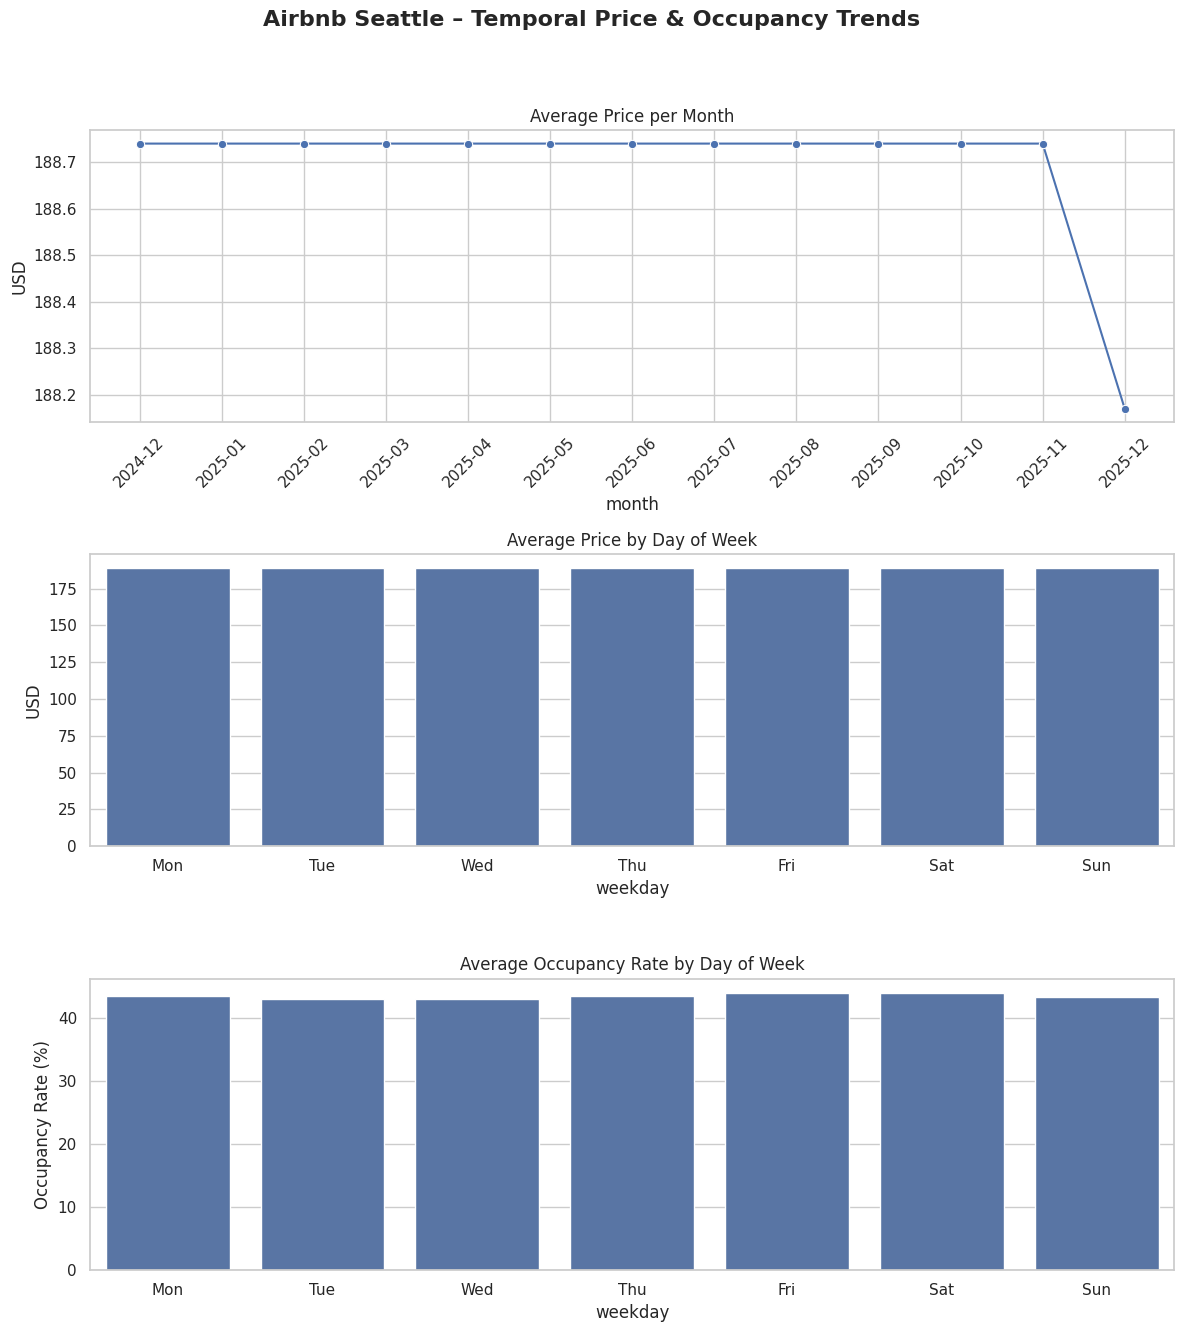

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connexion à la base
conn = sqlite3.connect("airbnb_seattle.db")

# 1. Prix moyen par mois
query_month = """
SELECT
  STRFTIME('%Y-%m', date) AS month,
  ROUND(AVG(REPLACE(price, '$', '') * 1.0), 2) AS avg_price
FROM calendar
WHERE price IS NOT NULL
GROUP BY month
ORDER BY month;
"""
df_month = pd.read_sql_query(query_month, conn)

# 2. Prix moyen par jour de la semaine
query_weekday_price = """
SELECT
  STRFTIME('%w', date) AS weekday,
  ROUND(AVG(REPLACE(price, '$', '') * 1.0), 2) AS avg_price
FROM calendar
WHERE price IS NOT NULL
GROUP BY weekday
ORDER BY weekday;
"""
df_weekday_price = pd.read_sql_query(query_weekday_price, conn)

# 3. Taux d’occupation par jour de la semaine
query_weekday_occ = """
SELECT
  STRFTIME('%w', date) AS weekday,
  ROUND(100.0 * SUM(CASE WHEN available = 'f' THEN 1 ELSE 0 END) / COUNT(*), 2) AS occupancy_rate
FROM calendar
GROUP BY weekday
ORDER BY weekday;
"""
df_weekday_occ = pd.read_sql_query(query_weekday_occ, conn)

# Mapping jours de la semaine
weekday_map = {
    '0': 'Sun', '1': 'Mon', '2': 'Tue', '3': 'Wed',
    '4': 'Thu', '5': 'Fri', '6': 'Sat'
}
df_weekday_price['weekday'] = df_weekday_price['weekday'].map(weekday_map)
df_weekday_occ['weekday'] = df_weekday_occ['weekday'].map(weekday_map)

# Tri des jours dans l'ordre logique
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_weekday_price['weekday'] = pd.Categorical(df_weekday_price['weekday'], categories=order, ordered=True)
df_weekday_occ['weekday'] = pd.Categorical(df_weekday_occ['weekday'], categories=order, ordered=True)

# Affichage
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(12, 14))
fig.suptitle("Airbnb Seattle – Temporal Price & Occupancy Trends", fontsize=16, weight="bold")

# Prix moyen par mois
sns.lineplot(data=df_month, x="month", y="avg_price", ax=axs[0], marker="o")
axs[0].set_title("Average Price per Month")
axs[0].set_ylabel("USD")
axs[0].tick_params(axis='x', rotation=45)

# Prix moyen par jour de semaine
sns.barplot(data=df_weekday_price.sort_values("weekday"), x="weekday", y="avg_price", ax=axs[1])
axs[1].set_title("Average Price by Day of Week")
axs[1].set_ylabel("USD")

# Taux d’occupation par jour de semaine
sns.barplot(data=df_weekday_occ.sort_values("weekday"), x="weekday", y="occupancy_rate", ax=axs[2])
axs[2].set_title("Average Occupancy Rate by Day of Week")
axs[2].set_ylabel("Occupancy Rate (%)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
